In [40]:
%pylab inline

from jade.run_manager.wandb import WANDBRunManager

Populating the interactive namespace from numpy and matplotlib


In [41]:
run_manager = WANDBRunManager(run_id='1979j4qb', experiments_root='/tmp', verbose=True)

Run mfederici/jade_test/1979j4qb has been found


ELBO/Train,-744.67273
TrainLog/ReconstructionLoss,740.45627
_step,784
_runtime,33
TrainLog/Loss,742.87947
TrainLog/RegularizationLoss,4.84641
ELBO/Test,-744.83484
_timestamp,1624550757


{'model': {'class': 'VariationalAutoencoder', 'params': {'beta': 0.5, 'decoder_layers': [256, 1024], 'encoder_layers': [1024, 256], 'z_dim': 64}}, 'trainer': {'class': 'BatchTrainer', 'params': {'batch_size': 256, 'num_workers': 6, 'optimizers': {'default': {'class': 'Adam', 'params': {'lr': 0.0001}}}, 'train_on': 'train'}}, 'data': {'test': {'class': 'MNISTWrapper', 'params': {'download': True, 'root': '/data', 'split': 'valid'}}, 'train': {'class': 'MNISTWrapper', 'params': {'download': True, 'root': '/data', 'split': 'train'}}}, 'eval': {'ELBO/Test': {'class': 'ELBOEvaluation', 'params': {'evaluate_on': 'test'}}, 'ELBO/Train': {'class': 'ELBOEvaluation', 'params': {'evaluate_on': 'train'}}, 'ImageReconstructions/Test': {'class': 'ReconstructionEvaluation', 'params': {'evaluate_every': 2, 'evaluate_on': 'test', 'n_pictures': 10, 'sample_images': False}}, 'ImageReconstructions/Train': {'class': 'ReconstructionEvaluation', 'params': {'evaluate_every': 2, 'evaluate_on': 'train', 'n_pict

In [35]:
model = run_manager.instantiate_model(resume=True)

Instantiating class VariationalAutoencoder from /tmp/wandb/run-20210624_180556-1979j4qb/files/code/models/VAE.py
Dowloading the last checkpoint: last_checkpoint.pt
Resuming Training
Resuming Training from iteration 1960


In [36]:
model

VariationalAutoencoder(
  (encoder): Encoder(
    (net): Sequential(
      (0): Flatten()
      (1): Linear(in_features=784, out_features=1024, bias=True)
      (2): ReLU(inplace=True)
      (3): Linear(in_features=1024, out_features=256, bias=True)
      (4): ReLU(inplace=True)
      (5): StochasticLinear(in_features=256, out_features=128, bias=True)
    )
  )
  (decoder): Decoder(
    (net): Sequential(
      (0): Linear(in_features=64, out_features=256, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=256, out_features=1024, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1024, out_features=784, bias=True)
      (5): Reshape()
    )
  )
  (prior): Prior()
)

In [37]:
datasets = run_manager.instantiate_datasets()

In [38]:
train_set = datasets['train']

Instantiating class MNISTWrapper from /tmp/wandb/run-20210624_180556-1979j4qb/files/code/data/MNIST.py


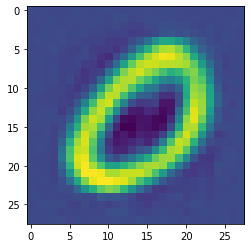

In [39]:
train_set[0]

plt.imshow(model.reconstruct(train_set[1]['x'])[0,0].data.numpy())

In [31]:
import torch.nn as nn

attributes_to_store = set()

for component_name in dir(model):
    component = getattr(model, component_name)
    if isinstance(component, nn.Module):
        store = False
        for name, parameter_group in component.named_parameters():
            store = store or parameter_group.requires_grad
        if store:
            attributes_to_store.add(component_name)

print(attributes_to_store)

{'label_classifier', 'encoder'}
